# Goal

- Calculate menu pin rate
- Calculate overall non-default rate

Engineer QA Ticket: https://phabricator.wikimedia.org/T346106

Data QA Ticket: https://phabricator.wikimedia.org/T346978   
Baseline Analysis Ticket: https://phabricator.wikimedia.org/T346979

__Baseline analysis on Nov. 29, 2023__

In [3]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Methodology

We defined the metrics as the ratio of the number of unique pageview sessions with non-default settings to the total number of unique pageview sessions that visited our site on a given day. We reviewed the minimum, maximum, average daily ratios, and the standard deviation for each individual feature as well as for the overall.

Our analysis uses data starting from Nov. 22, 2023, onward, excluding NULL events in the baseline calculations. We operate on the assumption that the opt-out rate for NULL sessions is similar to that of other sessions.


# Pin rate
% of pageview sessions which are viewing a pinned/unpinned version of the menus on the site (main menu,  tools menu)
For anonymous users : main menu & tools unpinned by default  
For loggin users: main menu & tools is pinned by default

In [21]:
query_pinned <- "
SELECT TO_DATE(dt) AS event_date, event.action , event.skin, event.isAnon, event.is_pinned, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=11 and day > 10
AND event.action='init' AND event.skin='vector-2022' 
AND event.is_pinned IS NOT NULL
GROUP BY TO_DATE(dt), event.action, event.skin, event.isAnon, event.is_pinned
ORDER BY event.isAnon, event_date,  event.is_pinned
LIMIT 10000
"

In [22]:
df_pinned <- wmfdata::query_hive(query_pinned)

Don't forget to authenticate with Kerberos using kinit



In [24]:
df_pinned_summary <- df_pinned %>%
  select(event_date, isanon, is_pinned, count_session) %>%
  spread(key=is_pinned, value=count_session) %>%
  arrange(isanon)

In [25]:
df_pinned_summary 

event_date isanon false   true   
1  2023-11-11 false     4452  128072
2  2023-11-12 false     4625  135643
3  2023-11-13 false     4996  153726
4  2023-11-14 false     4818  152414
5  2023-11-15 false     5000  151652
6  2023-11-16 false     9042  146242
7  2023-11-17 false    19677  130602
8  2023-11-18 false    18338  116236
9  2023-11-19 false    19319  124279
10 2023-11-20 false    20435  141169
11 2023-11-21 false    20629  138263
12 2023-11-22 false    19825  133710
13 2023-11-23 false    19006  126665
14 2023-11-24 false    18341  121530
15 2023-11-25 false    18206  113386
16 2023-11-26 false    19124  122906
17 2023-11-27 false    20605  140083
18 2023-11-28 false    20881  140809
19 2023-11-29 false    11304   71635
20 2023-11-11 true      9812 3693859
21 2023-11-12 true     10704 4150237
22 2023-11-13 true     12669 5861754
23 2023-11-14 true     12600 5796527
24 2023-11-15 true     24726 5547949
25 2023-11-16 true    977835 4611341
26 2023-11-17 true   4993441   14467
27 2023-11-18 true   3676505    5829
28 2023-11-19 true   4141883    4424
29 2023-11-20 true   5771625    4514
30 2023-11-21 true   5772311    3210
31 2023-11-22 true   5564650    2272
32 2023-11-23 true   5171795    1745
33 2023-11-24 true   4890129    1406
34 2023-11-25 true   3669413     942
35 2023-11-26 true   4147181     954
36 2023-11-27 true   5794961    1112
37 2023-11-28 true   5733690     929
38 2023-11-29 true   3064963     384

In [26]:
df_pinned_summary$event_date <- as.Date(df_pinned_summary$event_date )

In [27]:
df_pinned_summary %>%
  mutate(total_sessions = false+true, 
          is_pinned_rate=round(true/total_sessions, 4)
        )

event_date isanon false   true    total_sessions is_pinned_rate
1  2023-11-11 false     4452  128072  132524        0.9664        
2  2023-11-12 false     4625  135643  140268        0.9670        
3  2023-11-13 false     4996  153726  158722        0.9685        
4  2023-11-14 false     4818  152414  157232        0.9694        
5  2023-11-15 false     5000  151652  156652        0.9681        
6  2023-11-16 false     9042  146242  155284        0.9418        
7  2023-11-17 false    19677  130602  150279        0.8691        
8  2023-11-18 false    18338  116236  134574        0.8637        
9  2023-11-19 false    19319  124279  143598        0.8655        
10 2023-11-20 false    20435  141169  161604        0.8735        
11 2023-11-21 false    20629  138263  158892        0.8702        
12 2023-11-22 false    19825  133710  153535        0.8709        
13 2023-11-23 false    19006  126665  145671        0.8695        
14 2023-11-24 false    18341  121530  139871        0.8689        
15 2023-11-25 false    18206  113386  131592        0.8616        
16 2023-11-26 false    19124  122906  142030        0.8654        
17 2023-11-27 false    20605  140083  160688        0.8718        
18 2023-11-28 false    20881  140809  161690        0.8709        
19 2023-11-29 false    11304   71635   82939        0.8637        
20 2023-11-11 true      9812 3693859 3703671        0.9974        
21 2023-11-12 true     10704 4150237 4160941        0.9974        
22 2023-11-13 true     12669 5861754 5874423        0.9978        
23 2023-11-14 true     12600 5796527 5809127        0.9978        
24 2023-11-15 true     24726 5547949 5572675        0.9956        
25 2023-11-16 true    977835 4611341 5589176        0.8250        
26 2023-11-17 true   4993441   14467 5007908        0.0029        
27 2023-11-18 true   3676505    5829 3682334        0.0016        
28 2023-11-19 true   4141883    4424 4146307        0.0011        
29 2023-11-20 true   5771625    4514 5776139        0.0008        
30 2023-11-21 true   5772311    3210 5775521        0.0006        
31 2023-11-22 true   5564650    2272 5566922        0.0004        
32 2023-11-23 true   5171795    1745 5173540        0.0003        
33 2023-11-24 true   4890129    1406 4891535        0.0003        
34 2023-11-25 true   3669413     942 3670355        0.0003        
35 2023-11-26 true   4147181     954 4148135        0.0002        
36 2023-11-27 true   5794961    1112 5796073        0.0002        
37 2023-11-28 true   5733690     929 5734619        0.0002        
38 2023-11-29 true   3064963     384 3065347        0.0001

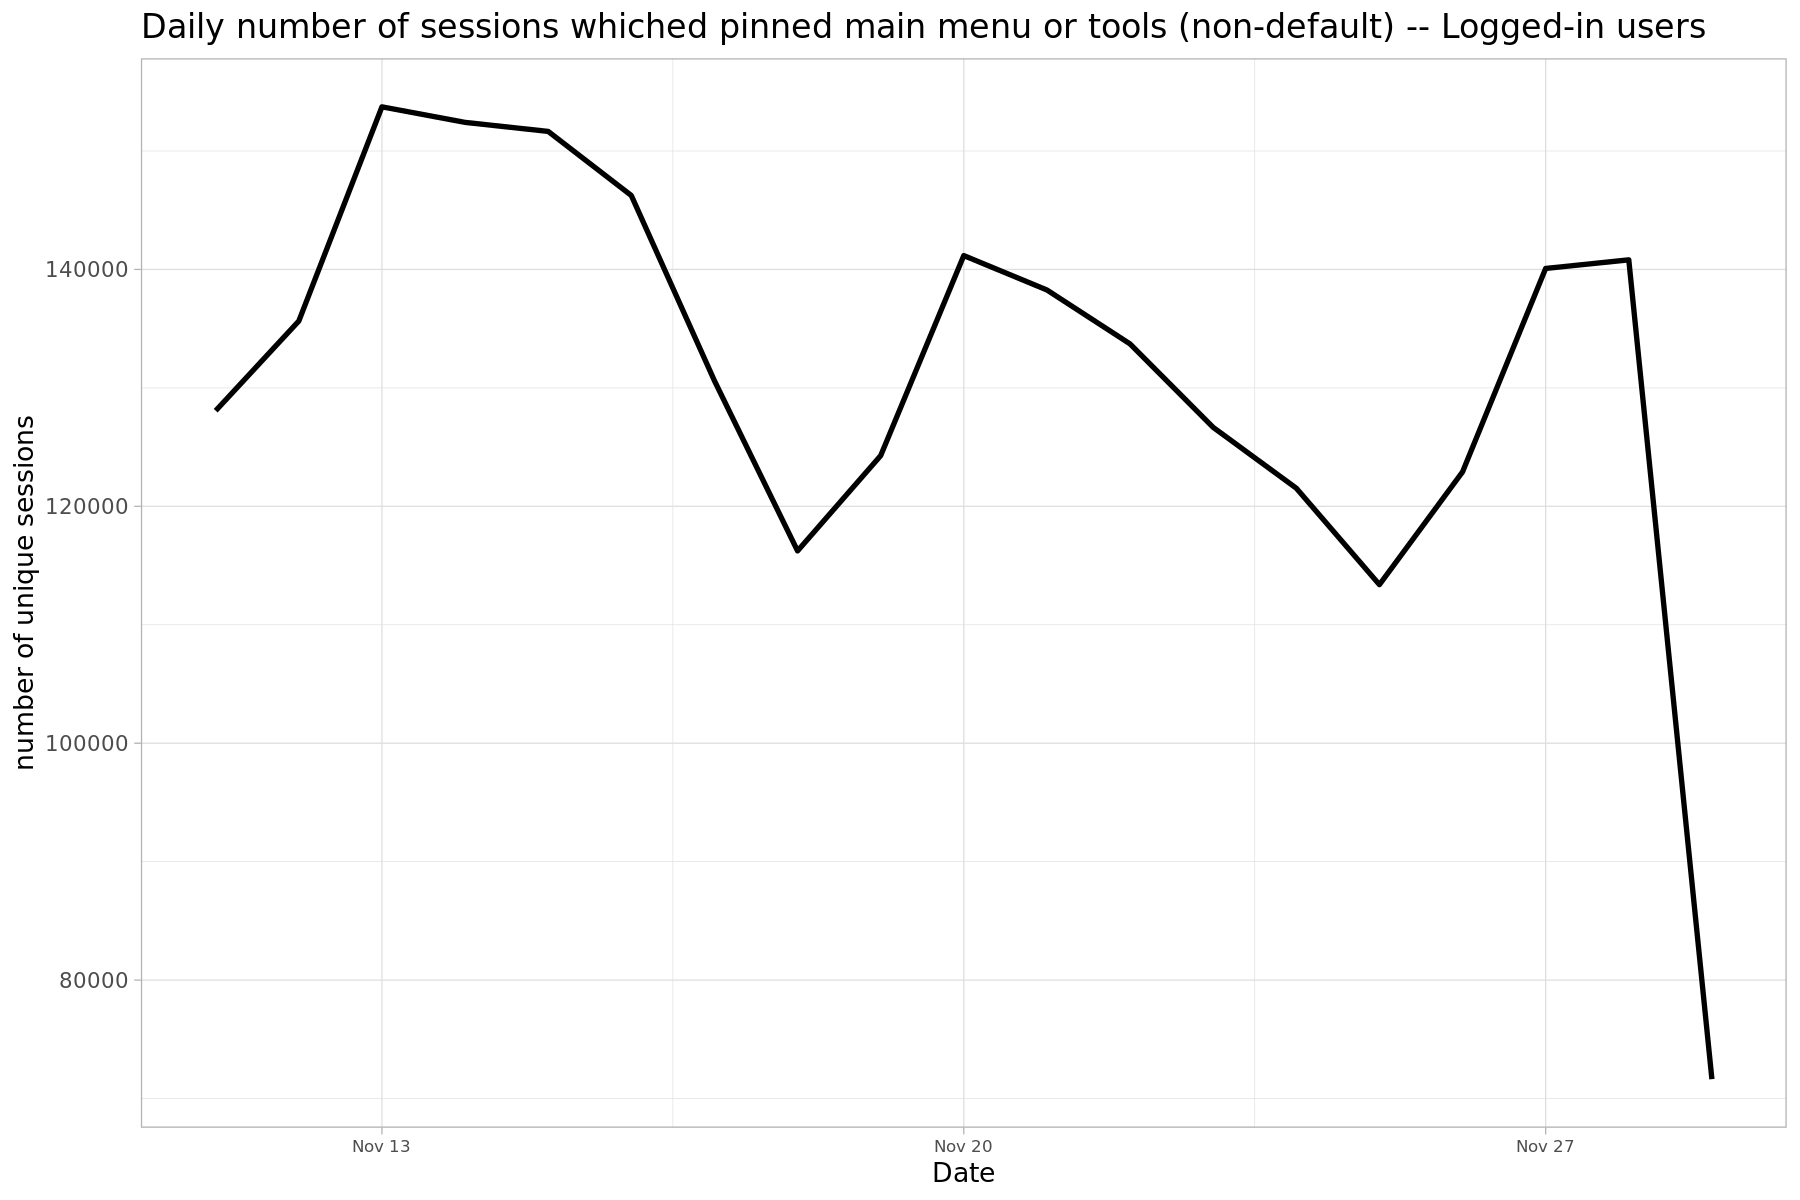

In [28]:
g_daily <- df_pinned_summary %>%
    filter(isanon=='false') %>%
    ggplot(  mapping=aes(x=event_date, y= true)) +
geom_line( size = 1.5) +
labs(title = 'Daily number of sessions whiched pinned main menu or tools (non-default) -- Logged-in users ',
     x = 'Date',
     y = 'number of unique sessions') + 
theme_light(base_size = 16) +
theme(legend.position = "bottom", 
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20));
g_daily

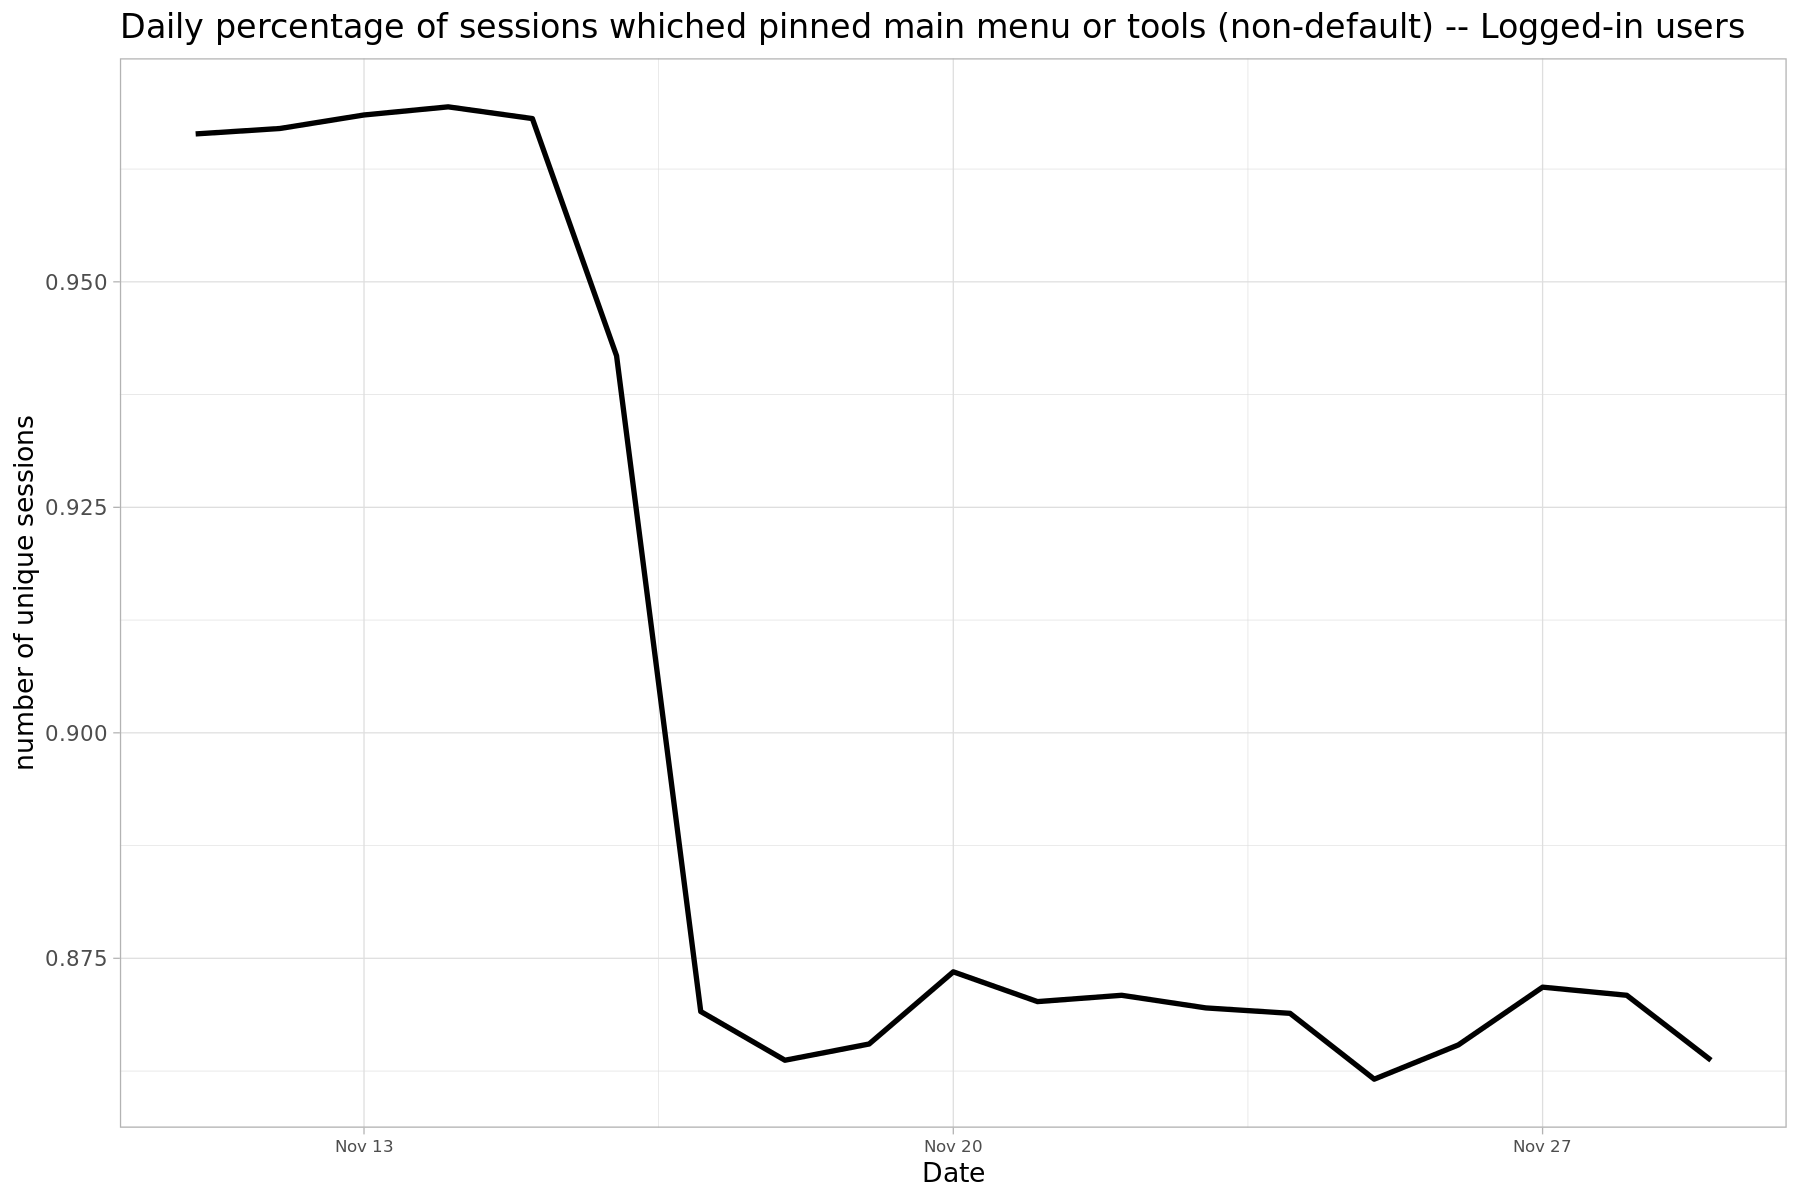

In [29]:
g_daily <- df_pinned_summary %>%
    filter(isanon=='false') %>%
  mutate(total_sessions = false+true, 
          is_pinned_rate=round(true/total_sessions, 4)
        ) %>%
    ggplot(  mapping=aes(x=event_date, y= is_pinned_rate)) +
geom_line( size = 1.5) +
labs(title = 'Daily percentage of sessions whiched pinned main menu or tools (non-default) -- Logged-in users ',
     x = 'Date',
     y = 'number of unique sessions') + 
theme_light(base_size = 16) +
theme(legend.position = "bottom", 
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20));
g_daily

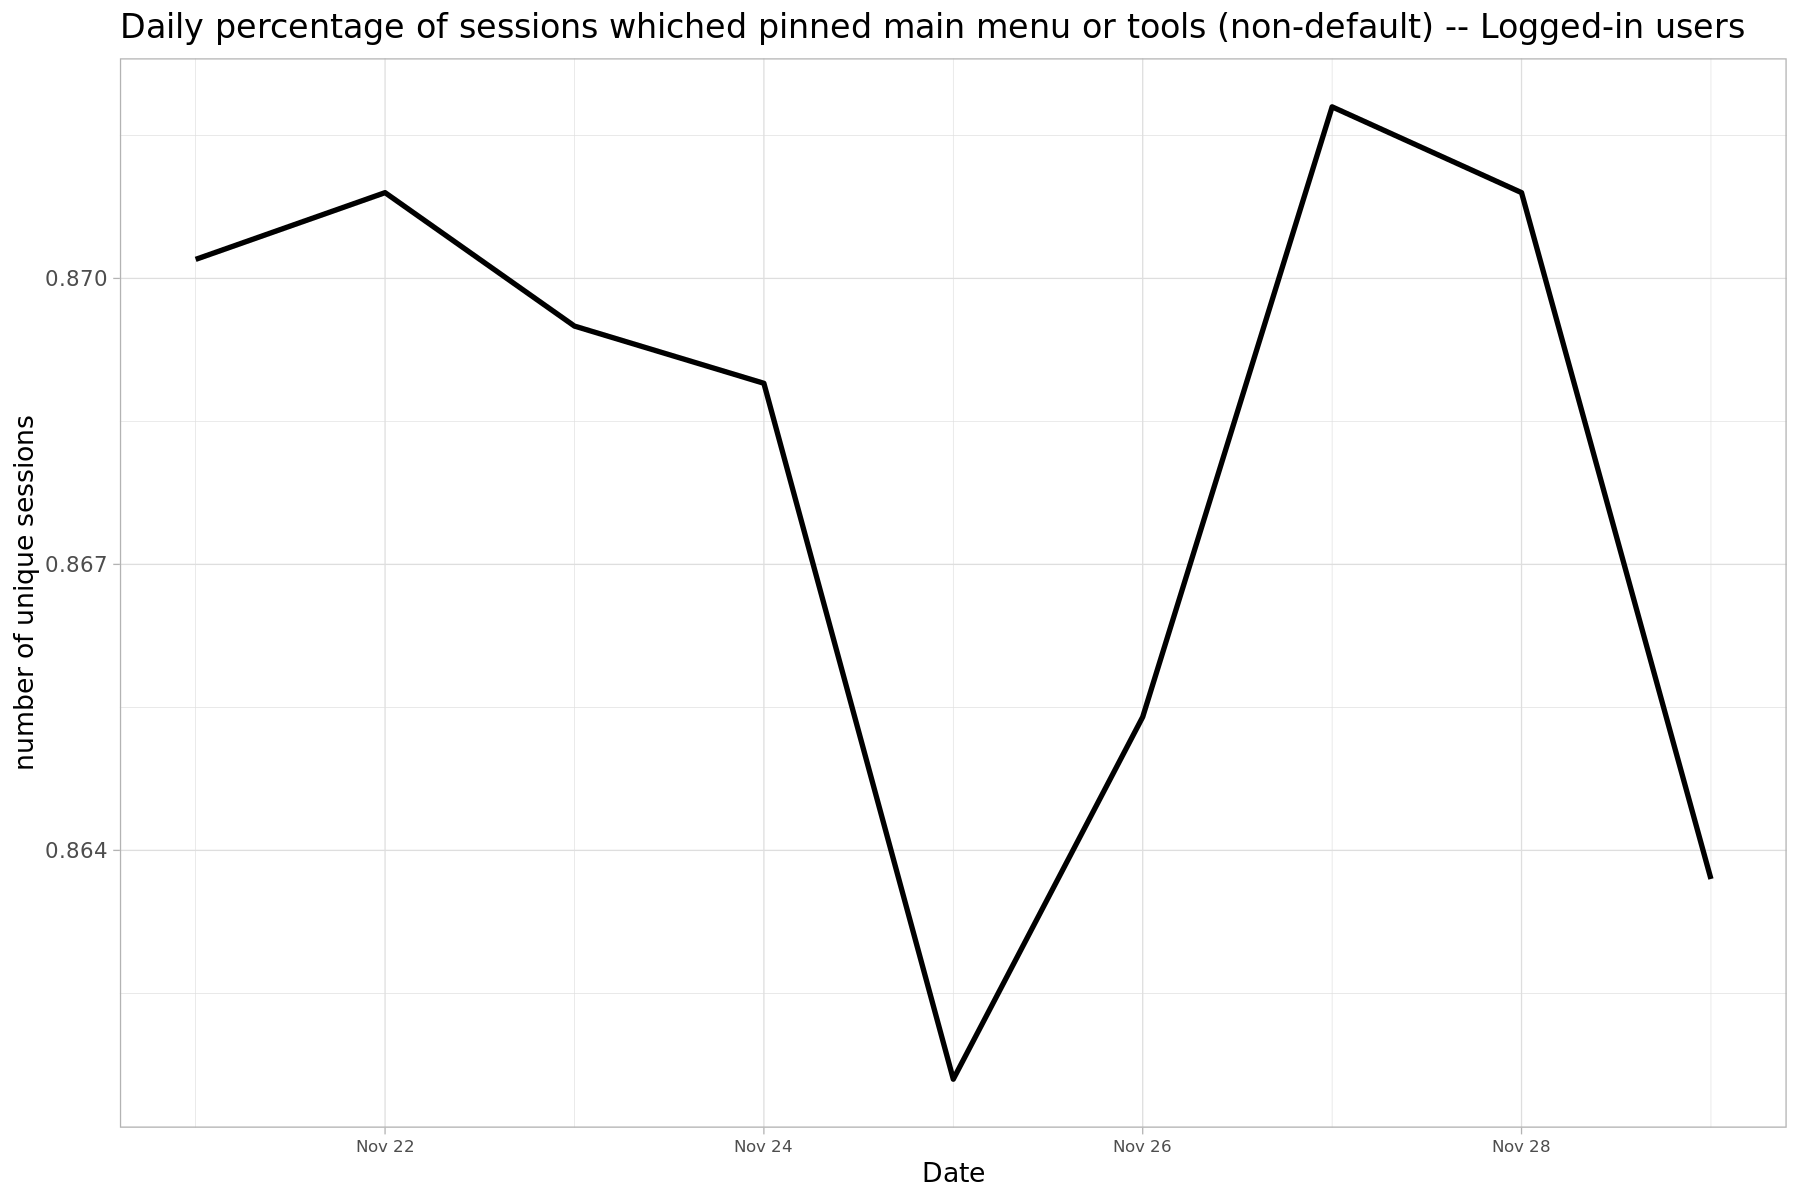

In [36]:
g_daily <- df_pinned_summary %>%
    filter(isanon=='false'& event_date > '2023-11-20') %>%
  mutate(total_sessions = false+true, 
          is_pinned_rate=round(true/total_sessions, 4)
        ) %>%
    ggplot(  mapping=aes(x=event_date, y= is_pinned_rate)) +
geom_line( size = 1.5) +
labs(title = 'Daily percentage of sessions whiched pinned main menu or tools (non-default) -- Logged-in users ',
     x = 'Date',
     y = 'number of unique sessions') + 
theme_light(base_size = 16) +
theme(legend.position = "bottom", 
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20));
g_daily

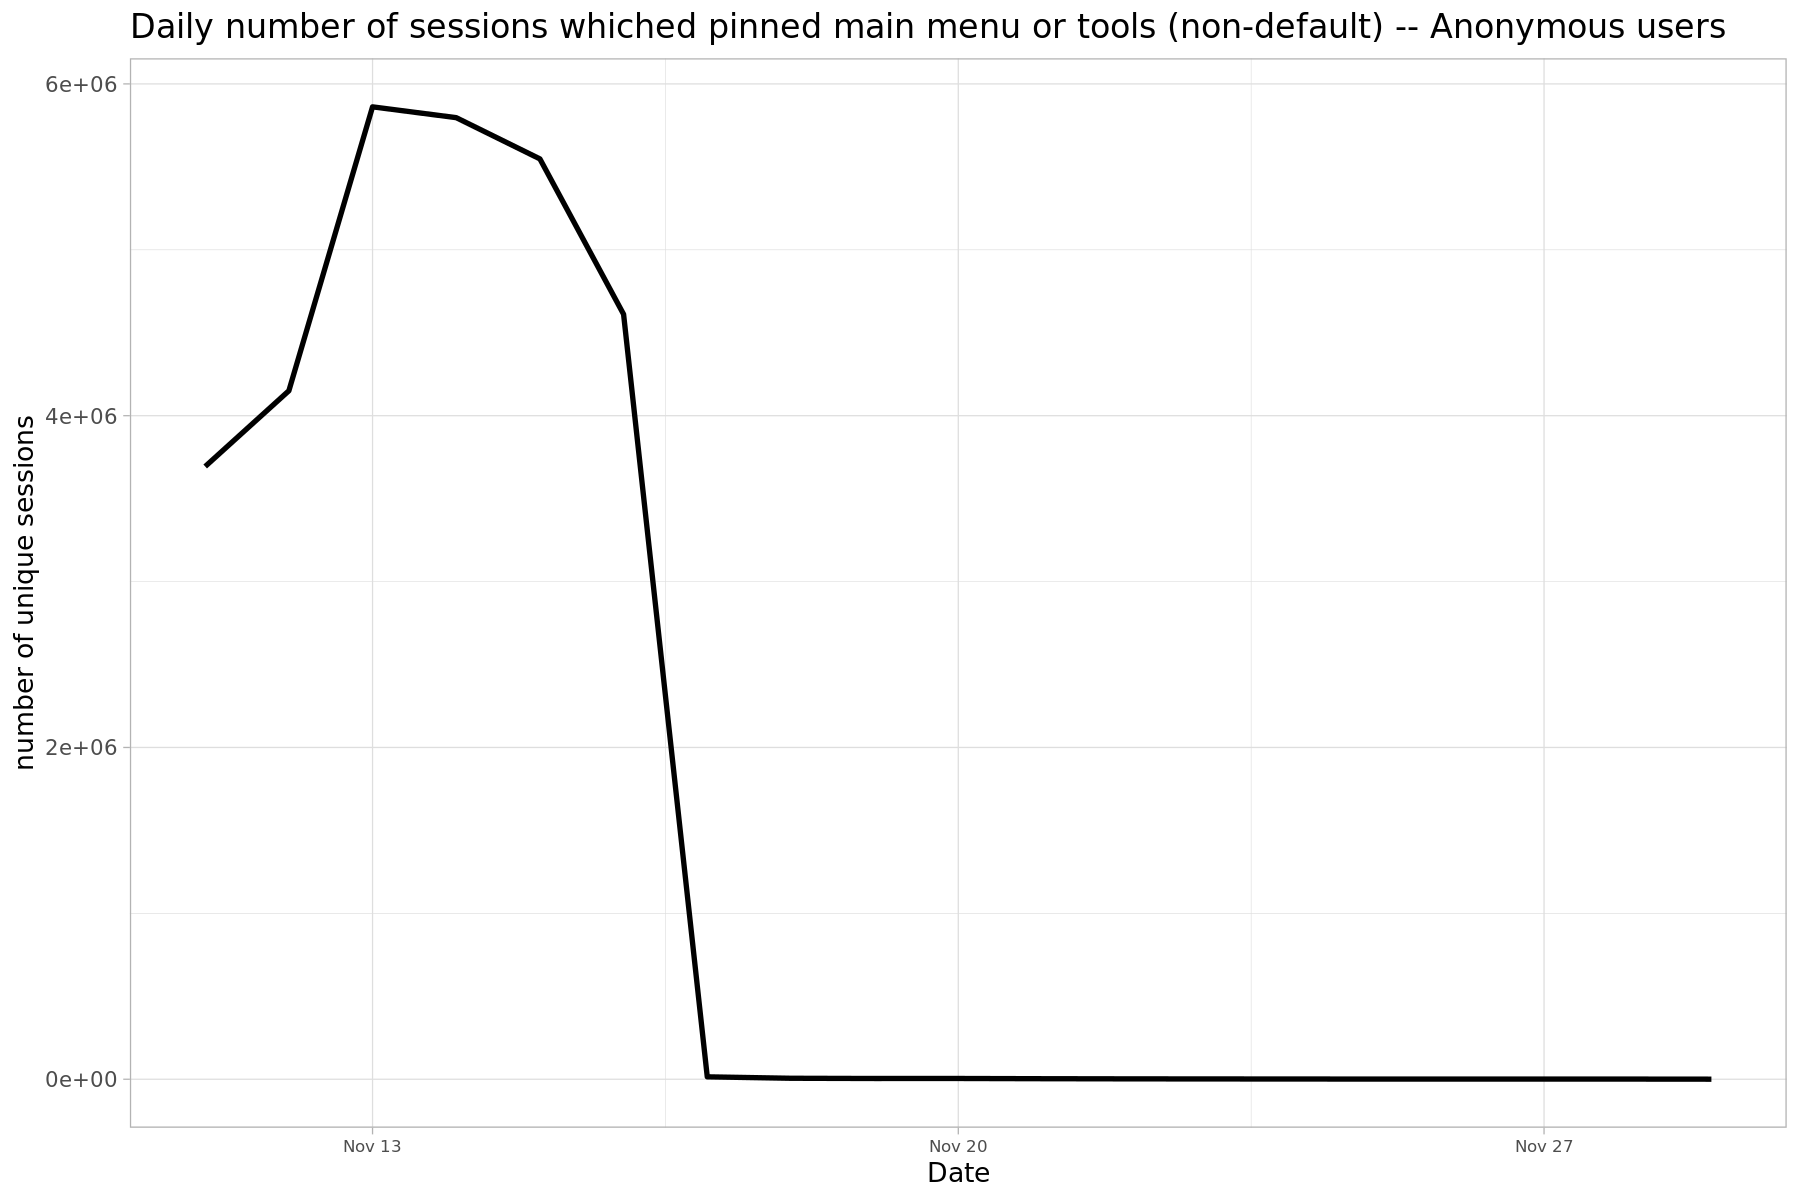

In [30]:
g_daily <- df_pinned_summary %>%
    filter(isanon=='true') %>%
    ggplot(  mapping=aes(x=event_date, y= true)) +
geom_line( size = 1.5) +
labs(title = 'Daily number of sessions whiched pinned main menu or tools (non-default) -- Anonymous users ',
     x = 'Date',
     y = 'number of unique sessions') + 
theme_light(base_size = 16) +
theme(legend.position = "bottom", 
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20));
g_daily

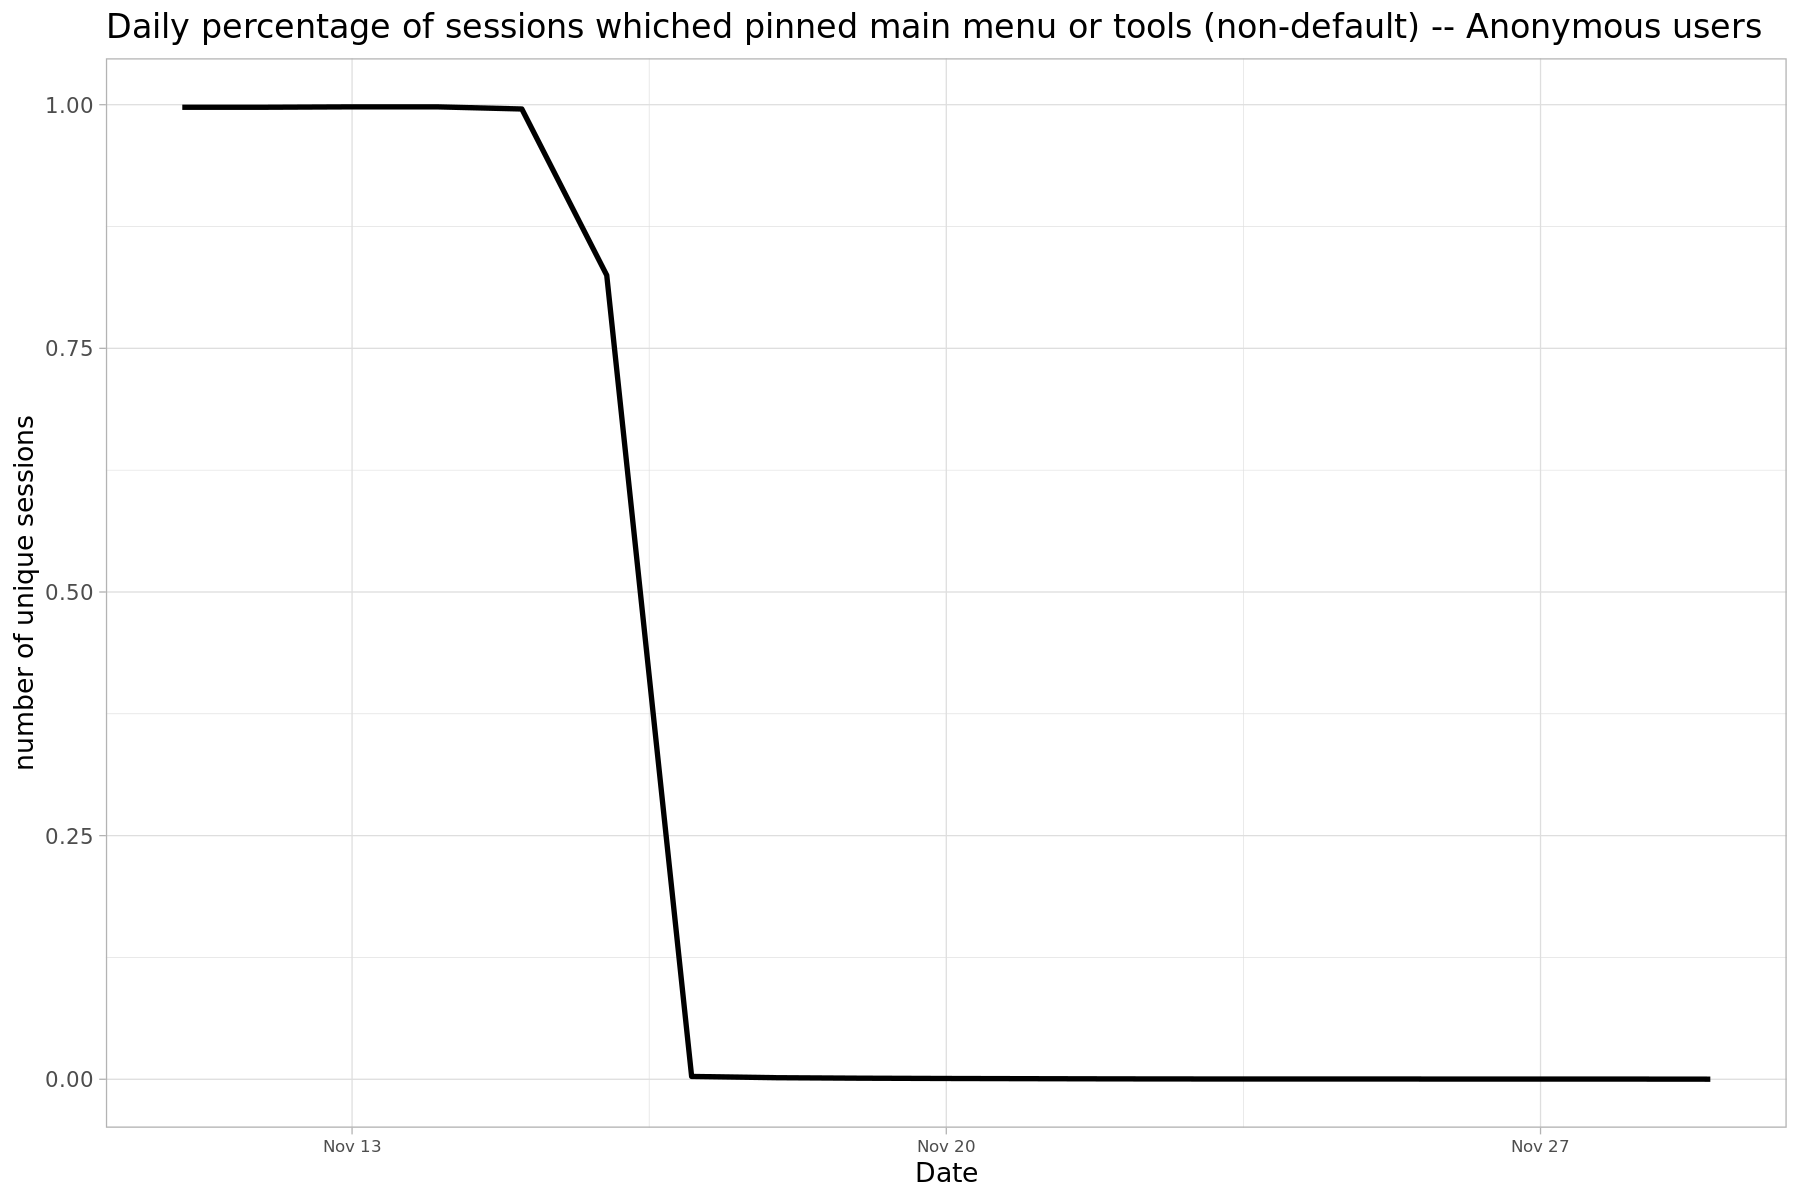

In [31]:
g_daily <- df_pinned_summary %>%
    filter(isanon=='true') %>%
  mutate(total_sessions = false+true, 
          is_pinned_rate=round(true/total_sessions, 4)
        ) %>%
    ggplot(  mapping=aes(x=event_date, y= is_pinned_rate)) +
geom_line( size = 1.5) +
labs(title = 'Daily percentage of sessions whiched pinned main menu or tools (non-default) -- Anonymous users ',
     x = 'Date',
     y = 'number of unique sessions') + 
theme_light(base_size = 16) +
theme(legend.position = "bottom", 
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20));
g_daily

### Note

The data has been stablized since 2023-11-22.  The baseline calculation uses the data collected between 2023-11-22 and 2023-11-28. 

In [37]:
df_non_default <- df_pinned_summary %>%
  filter(event_date>'2023-11-21' & event_date<='2023-11-28') %>%
  mutate(total_sessions = false+true, 
          is_pinned_rate=round(true/total_sessions, 4) )

In [38]:
df_non_default

event_date isanon false   true   total_sessions is_pinned_rate
1  2023-11-22 false    19825 133710  153535        0.8709        
2  2023-11-23 false    19006 126665  145671        0.8695        
3  2023-11-24 false    18341 121530  139871        0.8689        
4  2023-11-25 false    18206 113386  131592        0.8616        
5  2023-11-26 false    19124 122906  142030        0.8654        
6  2023-11-27 false    20605 140083  160688        0.8718        
7  2023-11-28 false    20881 140809  161690        0.8709        
8  2023-11-22 true   5564650   2272 5566922        0.0004        
9  2023-11-23 true   5171795   1745 5173540        0.0003        
10 2023-11-24 true   4890129   1406 4891535        0.0003        
11 2023-11-25 true   3669413    942 3670355        0.0003        
12 2023-11-26 true   4147181    954 4148135        0.0002        
13 2023-11-27 true   5794961   1112 5796073        0.0002        
14 2023-11-28 true   5733690    929 5734619        0.0002

In [43]:
df_non_default <- df_non_default %>%
  mutate( non_default_rate= (
      case_when(
          #For anonymous users : main menu & tools unpinned by default
         # For loggin users: main menu & tools is pinned by default
          isanon=='false' ~ 1-is_pinned_rate,
          isanon=='true' ~ is_pinned_rate
         )
      )
    )

In [44]:
df_non_default 

event_date isanon false   true   total_sessions is_pinned_rate
1  2023-11-22 false    19825 133710  153535        0.8709        
2  2023-11-23 false    19006 126665  145671        0.8695        
3  2023-11-24 false    18341 121530  139871        0.8689        
4  2023-11-25 false    18206 113386  131592        0.8616        
5  2023-11-26 false    19124 122906  142030        0.8654        
6  2023-11-27 false    20605 140083  160688        0.8718        
7  2023-11-28 false    20881 140809  161690        0.8709        
8  2023-11-22 true   5564650   2272 5566922        0.0004        
9  2023-11-23 true   5171795   1745 5173540        0.0003        
10 2023-11-24 true   4890129   1406 4891535        0.0003        
11 2023-11-25 true   3669413    942 3670355        0.0003        
12 2023-11-26 true   4147181    954 4148135        0.0002        
13 2023-11-27 true   5794961   1112 5796073        0.0002        
14 2023-11-28 true   5733690    929 5734619        0.0002        
   non_default_rate
1  0.1291          
2  0.1305          
3  0.1311          
4  0.1384          
5  0.1346          
6  0.1282          
7  0.1291          
8  0.0004          
9  0.0003          
10 0.0003          
11 0.0003          
12 0.0002          
13 0.0002          
14 0.0002

In [46]:
df_non_default  %>%
  group_by( isanon)%>%
  summarize(min=min(is_pinned_rate), max=max(is_pinned_rate), avg=mean(is_pinned_rate), std=sd(is_pinned_rate), .groups='drop')     

isanon min    max    avg          std         
1 false  0.8616 0.8718 0.8684285714 3.668657e-03
2 true   0.0002 0.0004 0.0002714286 7.559289e-05

In [45]:
df_non_default  %>%
  group_by( isanon)%>%
  summarize(min=min(non_default_rate), max=max(non_default_rate), avg=mean(non_default_rate), std=sd(non_default_rate), .groups='drop')     

isanon min    max    avg          std         
1 false  0.1282 0.1384 0.1315714286 3.668657e-03
2 true   0.0002 0.0004 0.0002714286 7.559289e-05

### Number of sessions with pin enabled (non-default) / total number of initialized sessions

While discussing the default value of event.is_pinned, we discovered that the default value varies between the main menu, table of contents, and tools menu. For logged-in users the default value may change based on the user's screen size. We decided to exclude ToC from is_pinned tracking as it has different default value from others.

Since Nov 10 (https://phabricator.wikimedia.org/T349924), event.is_pinned pin status of main menu and tools menu, which are unpinned by default.   
The pin rate based on the data collected between Nov. 22, 2023 and Nov. 28, 2023,
- Loggedin users: 86.8% on average, with a standard deviation of 0.37%.   
- Anonymous users:0.027% on average, with a standard deviation of 0.0076%.

For anonymous users, main menu & tools unpinned by default
For loggin users, main menu & tools is pinned by default

The non-default rate based on the data collected between Nov. 22, 2023 and Nov. 28, 2023,  
- Anonymous users:0.027% on average, with a standard deviation of 0.0076%.

# Overall non-default rate (only viewport > 1000px)
Overall % pageview sessions which enabled non-default settings (disabled preview, or  enabled full_width,or disabled media viewer, unpinned menu for logged-in users, pinned menu for anonymous users), only viewport > 1000px

In [105]:
query_overall <- "
SELECT TO_DATE(dt) AS event_date, event.action , event.skin, event.isAnon, event.is_page_preview_on, event.is_full_width, event.is_media_viewer_enabled,event.is_pinned,  count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 AND  month=11 
AND day BETWEEN 22 AND 28 
AND event.is_page_preview_on IS NOT NULL
AND event.action='init' AND event.skin='vector-2022'
AND NOT useragent.is_bot
AND  event.viewportSizeBucket IN ( '1000px-1199px','1200px-2000px','>2000px' )
GROUP BY  TO_DATE(dt), event.action, event.skin, event.isAnon, event.is_page_preview_on, event.is_full_width, event.is_media_viewer_enabled, event.is_pinned
ORDER BY  event.isAnon, event_date,  event.is_page_preview_on, event.is_full_width, event.is_media_viewer_enabled, event.is_pinned
LIMIT 10000
"

In [112]:
df_overall <- wmfdata::query_hive(query_overall )

Don't forget to authenticate with Kerberos using kinit



In [114]:
df_overall_summary <- df_overall %>%
  mutate(
       settings = case_when(

         # For loggin users: main menu & tools is pinned by default
           isanon=='false' & is_pinned=='true' & is_page_preview_on=='true'  & is_full_width=='false' & is_media_viewer_enabled=='true' ~ 'default',
          #For anonymous users : main menu & tools unpinned by default
            isanon=='true' & is_pinned=='false' & is_page_preview_on=='true'  & is_full_width=='false' & is_media_viewer_enabled=='true' ~ 'default',
           TRUE ~ 'non_default')
      ) %>%
  group_by(event_date, action, skin, isanon, settings ) %>%
  summarize(sum_sessions=sum(count_session),.groups='drop')

In [115]:
df_overall_summary

event_date action skin        isanon settings    sum_sessions
1  2023-11-22 init   vector-2022 false  default       72133     
2  2023-11-22 init   vector-2022 false  non_default   72777     
3  2023-11-22 init   vector-2022 true   default     4870749     
4  2023-11-22 init   vector-2022 true   non_default  414397     
5  2023-11-23 init   vector-2022 false  default       68109     
6  2023-11-23 init   vector-2022 false  non_default   69322     
7  2023-11-23 init   vector-2022 true   default     4507957     
8  2023-11-23 init   vector-2022 true   non_default  402155     
9  2023-11-24 init   vector-2022 false  default       64704     
10 2023-11-24 init   vector-2022 false  non_default   67241     
11 2023-11-24 init   vector-2022 true   default     4247135     
12 2023-11-24 init   vector-2022 true   non_default  397002     
13 2023-11-25 init   vector-2022 false  default       60489     
14 2023-11-25 init   vector-2022 false  non_default   63156     
15 2023-11-25 init   vector-2022 true   default     3095853     
16 2023-11-25 init   vector-2022 true   non_default  379941     
17 2023-11-26 init   vector-2022 false  default       65870     
18 2023-11-26 init   vector-2022 false  non_default   67648     
19 2023-11-26 init   vector-2022 true   default     3503865     
20 2023-11-26 init   vector-2022 true   non_default  426857     
21 2023-11-27 init   vector-2022 false  default       76538     
22 2023-11-27 init   vector-2022 false  non_default   75368     
23 2023-11-27 init   vector-2022 true   default     5079242     
24 2023-11-27 init   vector-2022 true   non_default  424442     
25 2023-11-28 init   vector-2022 false  default       77021     
26 2023-11-28 init   vector-2022 false  non_default   75784     
27 2023-11-28 init   vector-2022 true   default     5028325     
28 2023-11-28 init   vector-2022 true   non_default  413636

In [116]:
df_overall_summary_W  <-  df_overall_summary %>%
     spread(key=settings, value=sum_sessions) 

In [117]:
df_overall_summary_W %>% 
    mutate(total_sessions = default+non_default,
          non_default_rate=round(non_default/total_sessions, 4)
        ) %>%
   arrange(isanon)

event_date action skin        isanon default non_default total_sessions
1  2023-11-22 init   vector-2022 false    72133  72777       144910       
2  2023-11-23 init   vector-2022 false    68109  69322       137431       
3  2023-11-24 init   vector-2022 false    64704  67241       131945       
4  2023-11-25 init   vector-2022 false    60489  63156       123645       
5  2023-11-26 init   vector-2022 false    65870  67648       133518       
6  2023-11-27 init   vector-2022 false    76538  75368       151906       
7  2023-11-28 init   vector-2022 false    77021  75784       152805       
8  2023-11-22 init   vector-2022 true   4870749 414397      5285146       
9  2023-11-23 init   vector-2022 true   4507957 402155      4910112       
10 2023-11-24 init   vector-2022 true   4247135 397002      4644137       
11 2023-11-25 init   vector-2022 true   3095853 379941      3475794       
12 2023-11-26 init   vector-2022 true   3503865 426857      3930722       
13 2023-11-27 init   vector-2022 true   5079242 424442      5503684       
14 2023-11-28 init   vector-2022 true   5028325 413636      5441961       
   non_default_rate
1  0.5022          
2  0.5044          
3  0.5096          
4  0.5108          
5  0.5067          
6  0.4961          
7  0.4960          
8  0.0784          
9  0.0819          
10 0.0855          
11 0.1093          
12 0.1086          
13 0.0771          
14 0.0760

In [118]:
df_overall_summary_W %>% 
    mutate(total_sessions = default+non_default,
          non_default_rate=round(non_default/total_sessions, 4)
        ) %>%
    group_by( isanon)%>%
        summarize(min=min(non_default_rate), max=max(non_default_rate), avg=mean(non_default_rate), std=sd(non_default_rate), .groups='drop')     

isanon min   max    avg        std        
1 false  0.496 0.5108 0.50368571 0.005972277
2 true   0.076 0.1093 0.08811429 0.014585316

### Conclusion 2

### Number of sessions with non-default settings / total number of initialized sessions. (viewport > 1000px)

- For anonymous users non-default settings include a disabled preview, enabled full width, a disabled media viewer, or __pinned__ main menu & tools.
- For logged users non-default settings include a disabled preview, enabled full width, a disabled media viewer, or __unpinned__ main menu & tools for screen size larger than 1000px. For small screen size, the menu & tools  will be __unpinned__ by default and user can not set. As the default value changes based on the screen size, we exclude sessions whose viewport are smaller than 1000px when we calculate the overall non-default rate for logged users. 

The non-default rate for screen sizes larger than 1000px, based on the data collected between Nov. 22, 2023 and Nov. 28, 2023,   
- Logged-in users: 50.4% on average, with a standard deviation of 0.60%.
- Anonymous users: 8.8% on average, with a standard deviation of 1.5%. 

# Break down by screen size

In [64]:
query_pinned2 <- "
SELECT TO_DATE(dt) AS event_date, event.action , event.skin, event.isAnon, event.viewportSizeBucket, event.is_pinned, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=11 
AND day BETWEEN 22 AND 28
AND event.action='init' AND event.skin='vector-2022' 
AND event.is_pinned IS NOT NULL
AND NOT useragent.is_bot
GROUP BY TO_DATE(dt), event.action, event.skin, event.isAnon, event.viewportSizeBucket, event.is_pinned
ORDER BY event.isAnon, event_date,  event.is_pinned
LIMIT 10000
"

In [65]:
df_pinned2 <- wmfdata::query_hive(query_pinned2)

Don't forget to authenticate with Kerberos using kinit



In [68]:
df_pinned_summary2 <- df_pinned2 %>%
  select(event_date, isanon, is_pinned, viewportsizebucket, count_session) %>%
  spread(key=is_pinned, value=count_session) %>%
  arrange(isanon)

In [71]:
df_stats <- df_pinned_summary2 %>%
  mutate(total_sessions = false+true, 
          is_pinned_rate=round(true/total_sessions, 4)
        )

In [73]:
df_stats$event_date <- as.Date(df_stats$event_date )

In [78]:

df_stats$viewportsizebucket <- factor(df_stats$viewportsizebucket, 
        levels=c("<320px","320px-719px","720px-999px","1000px-1199px","1200px-2000px",">2000px"))

In [88]:
g_viewsizebucket <- df_stats %>%
 filter(isanon=='false') %>%
 ggplot(aes(x = event_date, y= is_pinned_rate)) +
       geom_line( size = 1.5, color='red') +
        facet_wrap(~viewportsizebucket) +
        labs (
              y = "pin rate" ,
             title = "Pin rate by viewport size bucket" ,
             caption = "User type: logged-in User" ) +
     scale_fill_manual(values= c( "#666666",  "#000099"), name = "group")  +
         theme(
           # panel.grid.major = element_blank(), 
           # panel.grid.minor = element_blank(),
            #panel.background = element_blank(),
            axis.text.x = element_text(angle=90),
            plot.caption = element_text(hjust = 0, face= "italic"),
           # strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=18),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
g_viewsizebucket

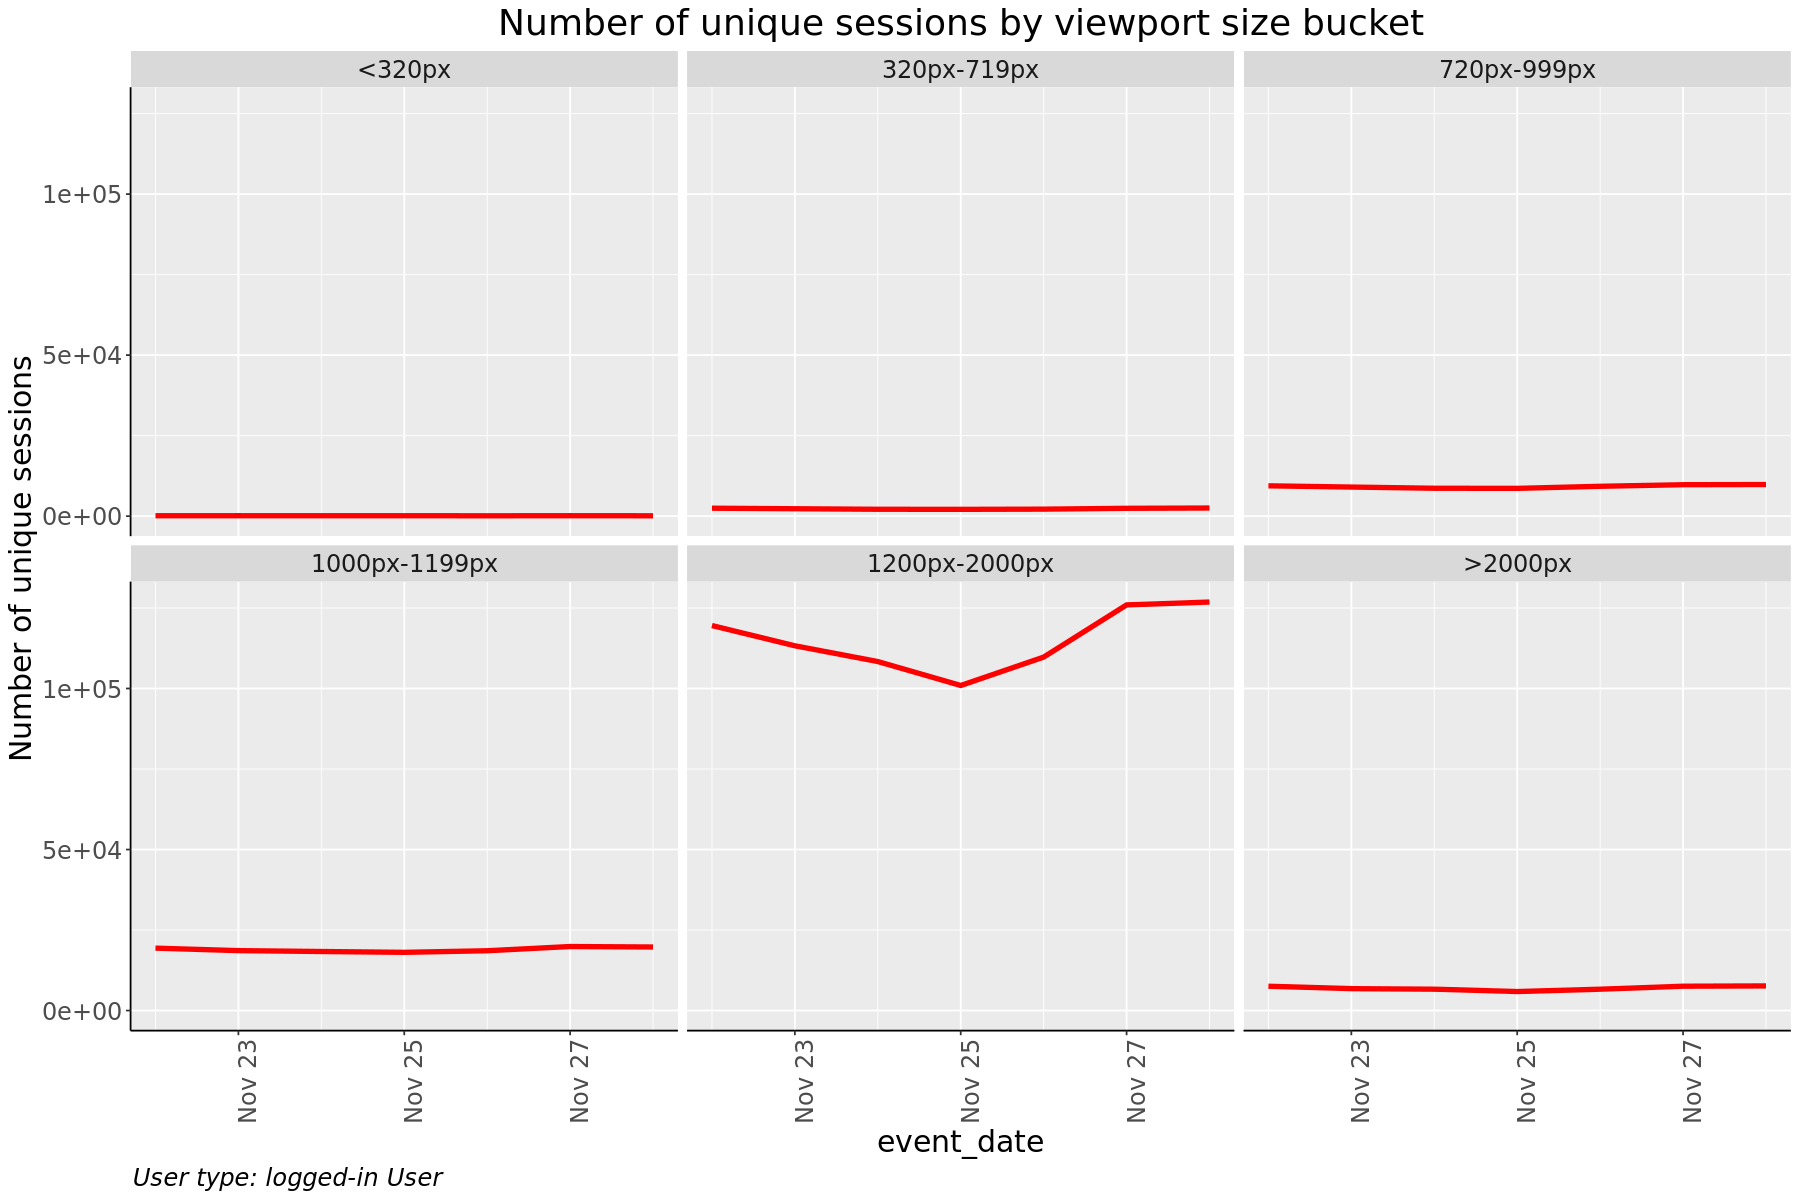

In [86]:
g_viewsizebucket <- df_stats %>%
 filter(isanon=='false') %>%
 ggplot(aes(x = event_date, y= total_sessions)) +
       geom_line( size = 1.5, color='red') +
        facet_wrap(~viewportsizebucket) +
        labs (
              y = "Number of unique sessions" ,
             title = "Number of unique sessions by viewport size bucket" ,
             caption = "User type: logged-in User" ) +
     scale_fill_manual(values= c( "#666666",  "#000099"), name = "group")  +
         theme(
            #panel.grid.major = element_blank(), 
            #panel.grid.minor = element_blank(),
            #panel.background = element_blank(),
            axis.text.x = element_text(angle=90),
            plot.caption = element_text(hjust = 0, face= "italic"),
            #strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=18),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
g_viewsizebucket

### Findings
75% of users are using device in 1200px-2000px categary

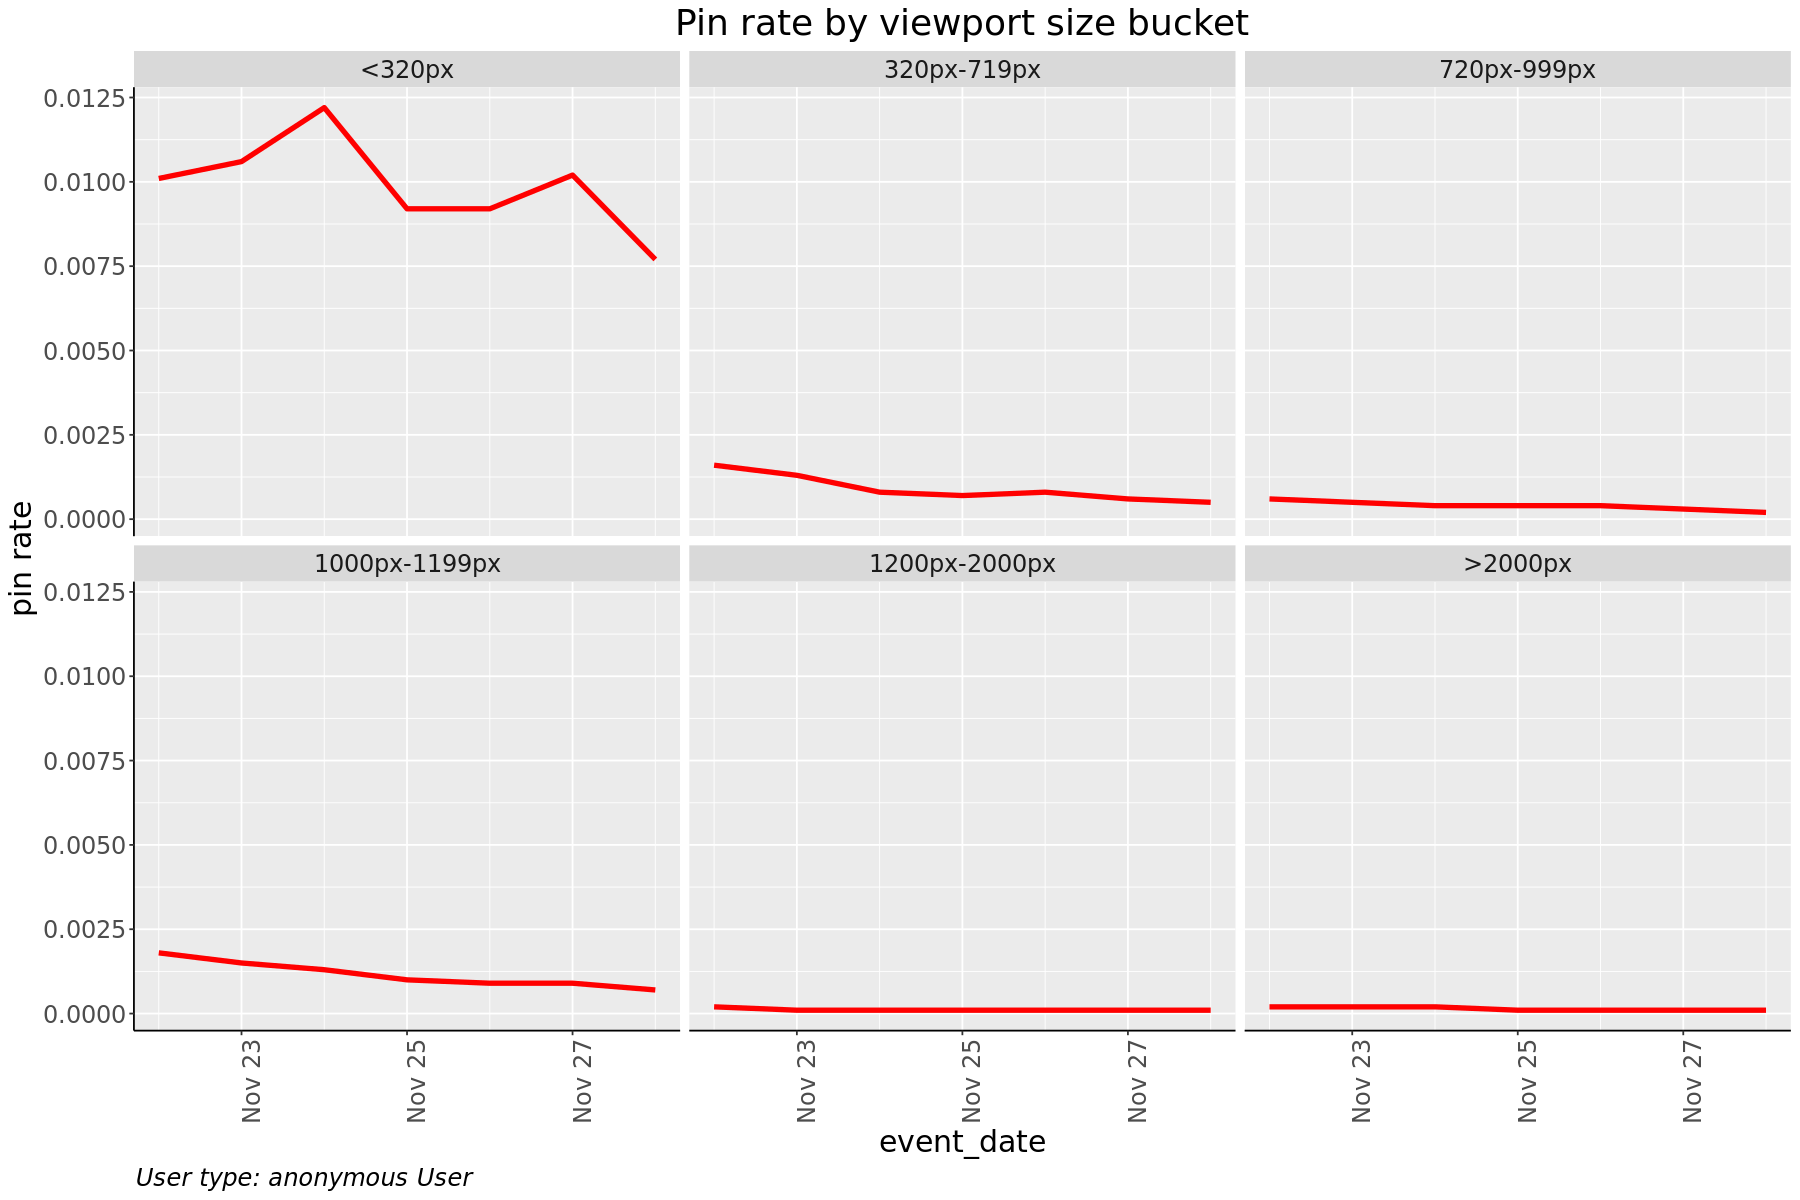

In [89]:
g_viewsizebucket <- df_stats %>%
 filter(isanon=='true') %>%
 ggplot(aes(x = event_date, y= is_pinned_rate)) +
       geom_line( size = 1.5, color='red') +
        facet_wrap(~viewportsizebucket) +
        labs (
              y = "pin rate" ,
             title = "Pin rate by viewport size bucket" ,
             caption = "User type: anonymous User" ) +
     scale_fill_manual(values= c( "#666666",  "#000099"), name = "group")  +
         theme(
           # panel.grid.major = element_blank(), 
           # panel.grid.minor = element_blank(),
            #panel.background = element_blank(),
            axis.text.x = element_text(angle=90),
            plot.caption = element_text(hjust = 0, face= "italic"),
           # strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=18),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
g_viewsizebucket

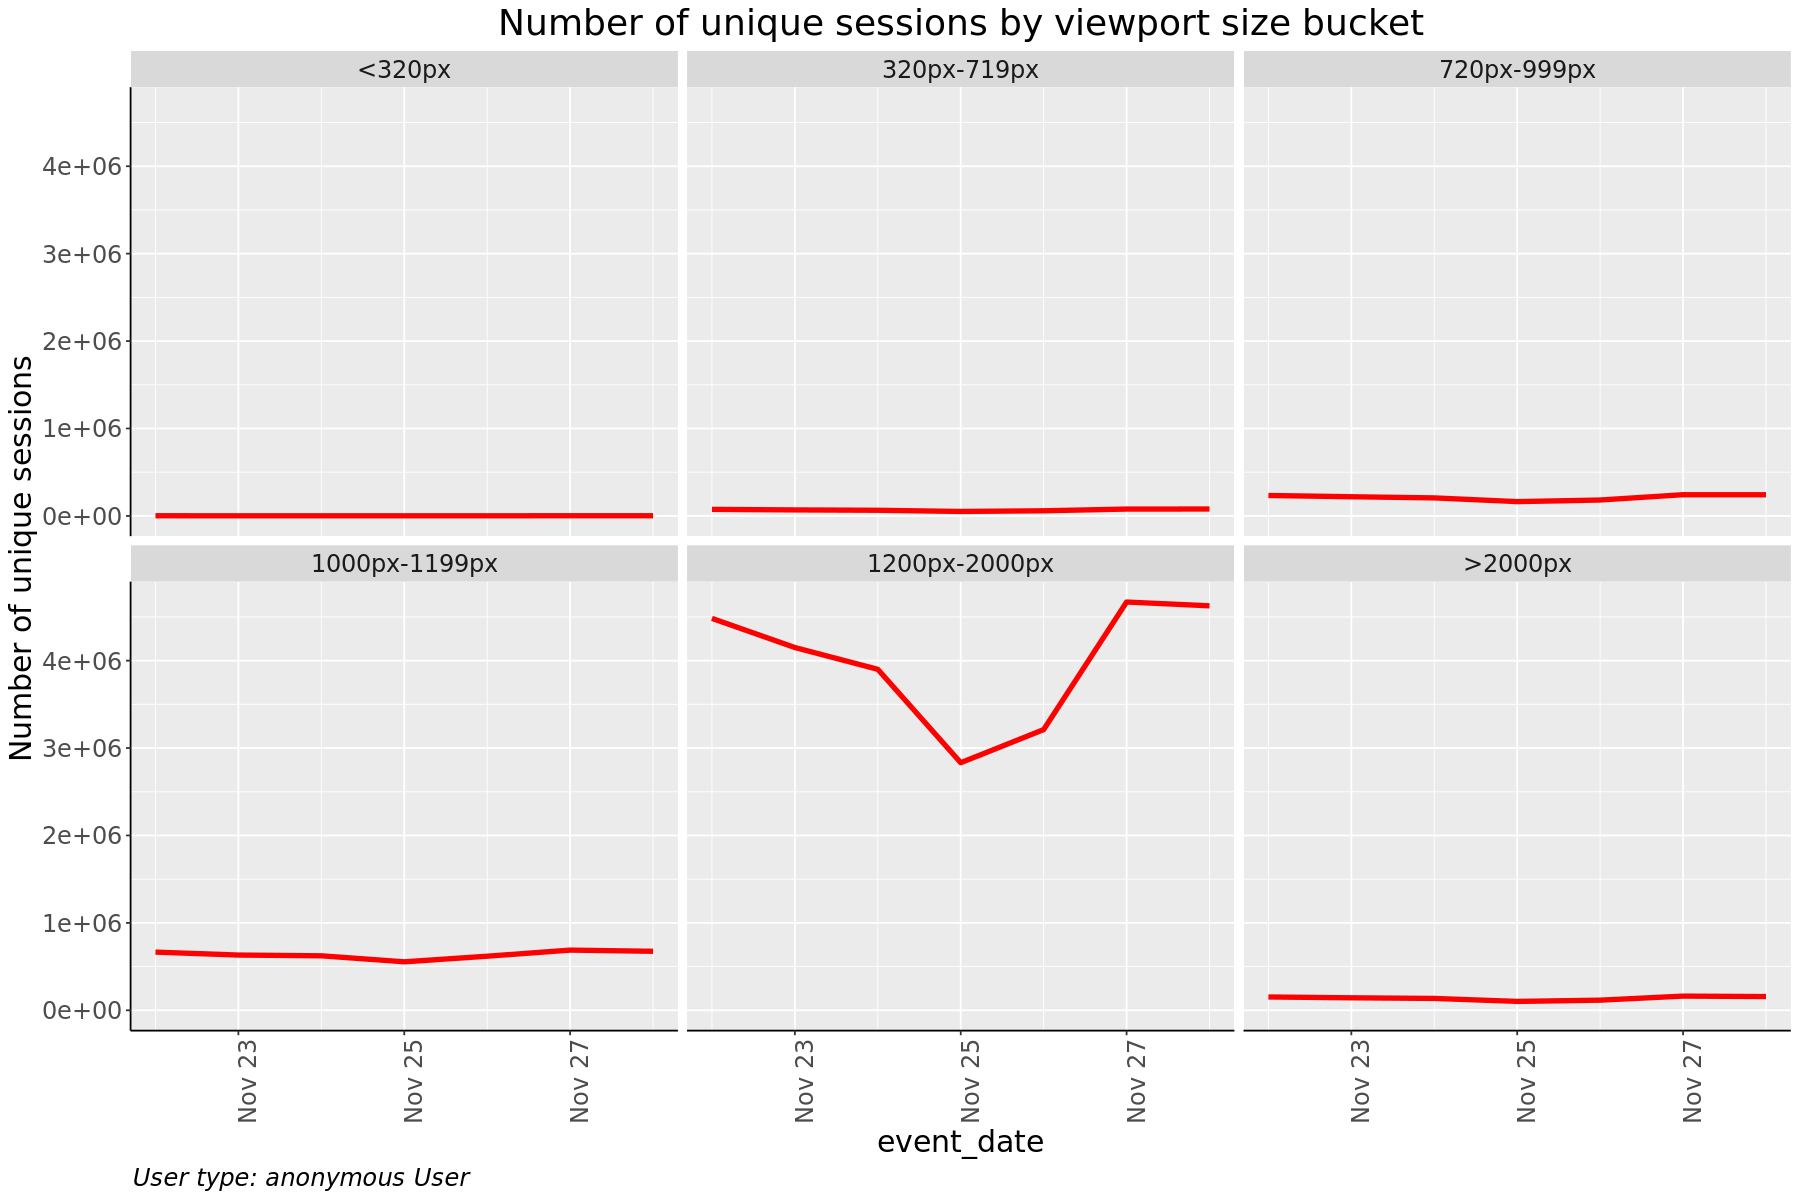

In [91]:
g_viewsizebucket <- df_stats %>%
 filter(isanon=='true') %>%
 ggplot(aes(x = event_date, y= total_sessions)) +
       geom_line( size = 1.5, color='red') +
        facet_wrap(~viewportsizebucket) +
        labs (
              y = "Number of unique sessions" ,
             title = "Number of unique sessions by viewport size bucket" ,
             caption = "User type: anonymous User" ) +
     scale_fill_manual(values= c( "#666666",  "#000099"), name = "group")  +
         theme(
            #panel.grid.major = element_blank(), 
            #panel.grid.minor = element_blank(),
            #panel.background = element_blank(),
            axis.text.x = element_text(angle=90),
            plot.caption = element_text(hjust = 0, face= "italic"),
            #strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=18),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
g_viewsizebucket

# Pin rate only for viewport > 1000px
% of pageview sessions which are viewing a pinned/unpinned version of the menus on the site (main menu,  tools menu) with viewportsizebucket > 1000px   
For anonymous users : main menu & tools unpinned by default   
For loggin users: main menu & tools is pinned by default


In [96]:
df_pinned2 %>%
  filter(viewportsizebucket=='1000px-1199px' | viewportsizebucket=='1200px-2000px' | viewportsizebucket=='>2000px' ) %>% 
  select(event_date, isanon, is_pinned, count_session) %>%
  group_by(event_date, isanon, is_pinned) %>%
  summarize(sum_session=sum(count_session), .groups='drop' )

event_date isanon is_pinned sum_session
1  2023-11-22 false  false       10163    
2  2023-11-22 false  true       136314    
3  2023-11-22 true   false     5299114    
4  2023-11-22 true   true         2006    
5  2023-11-23 false  false        9753    
6  2023-11-23 false  true       128919    
7  2023-11-23 true   false     4923097    
8  2023-11-23 true   true         1536    
9  2023-11-24 false  false        9585    
10 2023-11-24 false  true       123754    
11 2023-11-24 true   false     4658297    
12 2023-11-24 true   true         1262    
13 2023-11-25 false  false        9499    
14 2023-11-25 false  true       115419    
15 2023-11-25 true   false     3487927    
16 2023-11-25 true   true          838    
17 2023-11-26 false  false        9818    
18 2023-11-26 false  true       125139    
19 2023-11-26 true   false     3944953    
20 2023-11-26 true   true          838    
21 2023-11-27 false  false       10557    
22 2023-11-27 false  true       142853    
23 2023-11-27 true   false     5520273    
24 2023-11-27 true   true          988    
25 2023-11-28 false  false       10753    
26 2023-11-28 false  true       143484    
27 2023-11-28 true   false     5457980    
28 2023-11-28 true   true          819

In [97]:
df_pinned_summary3 <- df_pinned2 %>%
  filter(viewportsizebucket=='1000px-1199px' | viewportsizebucket=='1200px-2000px' | viewportsizebucket=='>2000px' ) %>% 
  select(event_date, isanon, is_pinned, count_session) %>%
  group_by(event_date, isanon, is_pinned) %>%
  summarize(sum_session=sum(count_session), .groups='drop' )%>% 
  spread(key=is_pinned, value=sum_session) %>%
  arrange(isanon)

In [98]:
df_pinned_summary3

event_date isanon false   true  
1  2023-11-22 false    10163 136314
2  2023-11-23 false     9753 128919
3  2023-11-24 false     9585 123754
4  2023-11-25 false     9499 115419
5  2023-11-26 false     9818 125139
6  2023-11-27 false    10557 142853
7  2023-11-28 false    10753 143484
8  2023-11-22 true   5299114   2006
9  2023-11-23 true   4923097   1536
10 2023-11-24 true   4658297   1262
11 2023-11-25 true   3487927    838
12 2023-11-26 true   3944953    838
13 2023-11-27 true   5520273    988
14 2023-11-28 true   5457980    819

In [100]:
df_stats_large_screen <- df_pinned_summary3 %>%
  mutate(total_sessions = false+true, 
          is_pinned_rate=round(true/total_sessions, 4)
        )

In [101]:
df_stats_large_screen <- df_stats_large_screen%>%
  mutate( non_default_rate= (
      case_when(
          #For anonymous users : main menu & tools unpinned by default
         # For loggin users: main menu & tools is pinned by default
          isanon=='false' ~ 1-is_pinned_rate,
          isanon=='true' ~ is_pinned_rate
         )
      )
    )

In [102]:
df_stats_large_screen

event_date isanon false   true   total_sessions is_pinned_rate
1  2023-11-22 false    10163 136314  146477        0.9306        
2  2023-11-23 false     9753 128919  138672        0.9297        
3  2023-11-24 false     9585 123754  133339        0.9281        
4  2023-11-25 false     9499 115419  124918        0.9240        
5  2023-11-26 false     9818 125139  134957        0.9273        
6  2023-11-27 false    10557 142853  153410        0.9312        
7  2023-11-28 false    10753 143484  154237        0.9303        
8  2023-11-22 true   5299114   2006 5301120        0.0004        
9  2023-11-23 true   4923097   1536 4924633        0.0003        
10 2023-11-24 true   4658297   1262 4659559        0.0003        
11 2023-11-25 true   3487927    838 3488765        0.0002        
12 2023-11-26 true   3944953    838 3945791        0.0002        
13 2023-11-27 true   5520273    988 5521261        0.0002        
14 2023-11-28 true   5457980    819 5458799        0.0002        
   non_default_rate
1  0.0694          
2  0.0703          
3  0.0719          
4  0.0760          
5  0.0727          
6  0.0688          
7  0.0697          
8  0.0004          
9  0.0003          
10 0.0003          
11 0.0002          
12 0.0002          
13 0.0002          
14 0.0002

In [103]:
df_stats_large_screen  %>%
  group_by( isanon)%>%
  summarize(min=min(is_pinned_rate), max=max(is_pinned_rate), avg=mean(is_pinned_rate), std=sd(is_pinned_rate), .groups='drop')     

isanon min    max    avg          std         
1 false  0.9240 0.9312 0.9287428571 2.510549e-03
2 true   0.0002 0.0004 0.0002571429 7.867958e-05

In [104]:
df_stats_large_screen  %>%
  group_by( isanon)%>%
  summarize(min=min(non_default_rate), max=max(non_default_rate), avg=mean(non_default_rate), std=sd(non_default_rate), .groups='drop')     

isanon min    max    avg          std         
1 false  0.0688 0.0760 0.0712571429 2.510549e-03
2 true   0.0002 0.0004 0.0002571429 7.867958e-05

### Conclusion 1
### Number of sessions with non-default / total number of initialized sessions with a screen size larger than 1000px

The pin rate based on the data collected between Nov. 22, 2023 and Nov. 28, 2023,
- Loggedin users: 92.9% on average, with a standard deviation of 0.25%.   
- Anonymous users:0.026% on average, with a standard deviation of 0.0079%.

For anonymous users, main menu & tools unpinned by default  
For loggin users, main menu & tools is pinned by default

The non-default rate based on the data collected between Nov. 22, 2023 and Nov. 28, 2023,  
- Loggedin users: 7.13% on average, with a standard deviation of 0.25%. 
- Anonymous users:0.026% on average, with a standard deviation of 0.0079%.


# Appendix
## Double check 


In [62]:
df_overall_summary2 <- df_overall %>%
  mutate(
       settings = case_when(
           is_page_preview_on=='true'  & is_full_width=='false' & is_media_viewer_enabled=='true' ~ 'default',
         TRUE ~ 'non_default')
      ) %>%
  group_by(event_date, action, skin, isanon, settings ) %>%
  summarize(sum_sessions=sum(count_session),.groups='drop')

In [57]:
df_overall_summary_W2  <-  df_overall_summary2 %>%
     spread(key=settings, value=sum_sessions) 

In [58]:
df_overall_summary_W2 %>% 
    mutate(total_sessions = default+non_default,
          non_default_rate=round(non_default/total_sessions, 4)
        ) %>%
   arrange(isanon)

event_date action skin        isanon default non_default total_sessions
1  2023-11-22 init   vector-2022 false    80568  74653       155221       
2  2023-11-23 init   vector-2022 false    76156  71105       147261       
3  2023-11-24 init   vector-2022 false    72331  68927       141258       
4  2023-11-25 init   vector-2022 false    67993  64948       132941       
5  2023-11-26 init   vector-2022 false    73811  69645       143456       
6  2023-11-27 init   vector-2022 false    85532  77003       162535       
7  2023-11-28 init   vector-2022 false    86361  77248       163609       
8  2023-11-22 init   vector-2022 true   5123821 445070      5568891       
9  2023-11-23 init   vector-2022 true   4741447 434035      5175482       
10 2023-11-24 init   vector-2022 true   4466989 426260      4893249       
11 2023-11-25 init   vector-2022 true   3263453 408396      3671849       
12 2023-11-26 init   vector-2022 true   3691730 458021      4149751       
13 2023-11-27 init   vector-2022 true   5341800 456410      5798210       
14 2023-11-28 init   vector-2022 true   5291373 445443      5736816       
   non_default_rate
1  0.4809          
2  0.4829          
3  0.4880          
4  0.4885          
5  0.4855          
6  0.4738          
7  0.4722          
8  0.0799          
9  0.0839          
10 0.0871          
11 0.1112          
12 0.1104          
13 0.0787          
14 0.0776

In [59]:
df_overall_summary_W2 %>% 
    mutate(total_sessions = default+non_default,
          non_default_rate=round(non_default/total_sessions, 4)
        ) %>%
    group_by( isanon)%>%
        summarize(min=min(non_default_rate), max=max(non_default_rate), avg=mean(non_default_rate), std=sd(non_default_rate), .groups='drop')     

isanon min    max    avg        std       
1 false  0.4722 0.4885 0.48168571 0.00652059
2 true   0.0776 0.1112 0.08982857 0.01468828